<a href="https://colab.research.google.com/github/jeonuenseo/eunseo/blob/master/11_hello_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST 분류기

In [43]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [44]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [45]:
X_train.shape

(60000, 28, 28)

In [46]:
Y_train.shape

(60000,)

In [47]:
Y_train[1]

0

In [48]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [49]:
Y_train[3]

1

In [50]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [51]:
input_size = 784
batch_size = 100
hidden_neurons = 400
epochs = 5

In [52]:
model = Sequential()

#test_mode를 변경, 마지막 정확도 확인

test_mode = 0

if test_mode ==0:
    model.add(Dense(hidden_neurons, input_dim=input_size)) 
    model.add(Activation('relu'))     
    model.add(Dense(classes)) 
    model.add(Activation('softmax'))
else:
    model.add(Dense(classes, input_dim=input_size))
    model.add(Activation('softmax'))

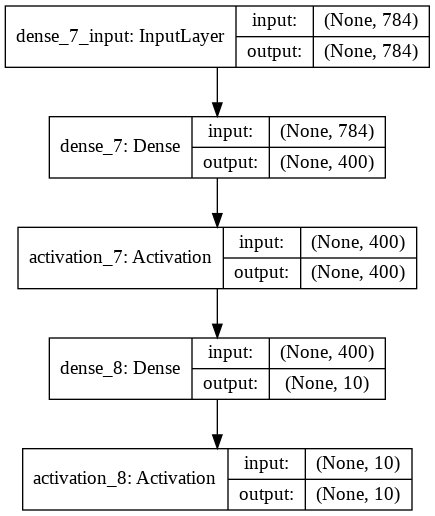

In [53]:
from keras.utils import plot_model
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [54]:
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [55]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.2844 - accuracy: 0.9204
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.1238 - accuracy: 0.9644
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0851 - accuracy: 0.9747
Epoch 4/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0646 - accuracy: 0.9815
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0503 - accuracy: 0.9854


In [56]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 
#Test accuracy: 0.983


10000/10000 [==============================] - 0s 47us/step

Test accuracy: 0.9758999943733215
